# 1) Using Simple Linear Regression Model

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel("Cleaned_data.xlsx")
df

X=df[["total_sales"]]
y=df['sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=77)

#### Modeling

In [16]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(X_train,y_train)
print("Coeffient:",model.coef_)
print("Intercept:",model.intercept_)

Coeffient: [0.04784052]
Intercept: 4389.814518436082


##### Explanation
- If 1 unit increase in total_spend   ---> Increase of 0.04784 units in sales
- Ex: If $10000 dollars spend on Ads  ---> We could expect 478 more units sold.

In [22]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=77)

import statsmodels.formula.api as smf
model1=smf.ols("y_train~X_train",data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     455.9
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.99e-48
Time:                        15:02:39   Log-Likelihood:                -1486.9
No. Observations:                 160   AIC:                             2978.
Df Residuals:                     158   BIC:                             2984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4389.8145    504.309      8.705      0.000    3393.758    5385.871
X_train        0.0478      0.002     21.352      0.000       0.043       0.052
==============================================================================
Omnibus:                        7.000   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.878
Skew:                          -0.409   Prob(JB):                       0.0321
Kurtosis:                       3.602   Cond. No.                     5.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Evaluation
- Calculate Train Accuracy or Train RMSE
- Calculate Cross-Validation
- Calculate Test Accuracy and Test RMSE

In [39]:
ypred_train=model.predict(X_train)

from sklearn.metrics import mean_squared_error,r2_score
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train R2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("Cross Validation score: ",cross_val_score(model,X_train,y_train,cv=5,scoring='r2').mean())

Train RMSE: 2628.0117251844995
Train R2: 0.7426281082244577
Cross Validation score:  0.7326556921038282


In [37]:
ypred_test=model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2:",r2_score(y_test,ypred_test))

Test RMSE: 2422.590173704026
Test R2: 0.7868779454628924


###### Checking the Linearity of Errors

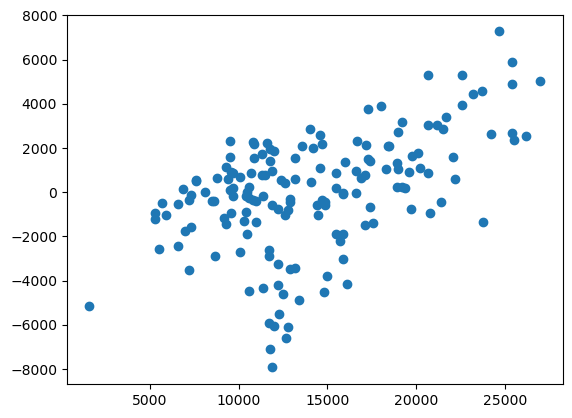

In [42]:
train_error=y_train-ypred_train
plt.scatter(y_train,train_error)
plt.show()

###### Equal Variance of the Error

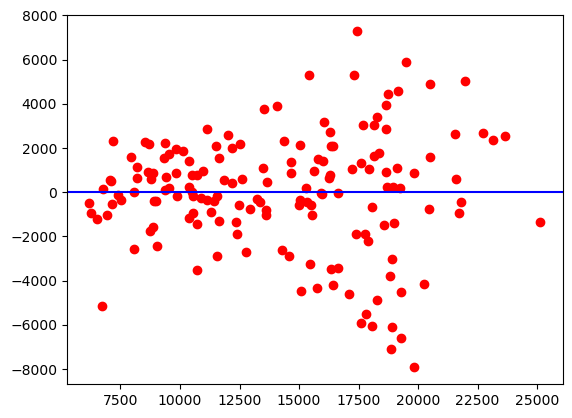

In [45]:
plt.scatter(ypred_train,train_error,c='r')
plt.axhline(y=0,color="Blue")
plt.show()

#### Now, use the model to make predictions on the new values

In [52]:
model.predict([[100000]])

C:\Users\chani\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9173.86699326])

In [56]:
#sales=4389.8145+0.04784*(total_sales)
sales=4389.8145+0.04784*100000
sales

9173.8145

# 2) Using Simple Non Linear Regression Model

In [143]:
import numpy as np
import pandas as pd
df=pd.read_excel("Cleaned_data.xlsx")
df

X=df[['total_sales']]
y=df['sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=77)

#### Modeling 

In [146]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)
X_train_poly=pd.DataFrame(polynomial_converter.fit_transform(X_train))
X_test_poly=pd.DataFrame(polynomial_converter.fit_transform(X_test))

from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(X_train_poly,y_train)
print("Coeff:",model.coef_)
print("Intercept:",model.intercept_)

Coeff: [ 8.59564389e-02 -2.09463379e-07  3.32634930e-13]
Intercept: 2540.582250262285


#### Evaluation
- Calculate Train Accuracy or Train RMSE
- Calculate Cross-Validation
- Calculate Test Accuracy and Test RMSE


In [73]:
ypred_train=model.predict(X_train_poly)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
print("train rmse: ",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("train r2:",r2_score(y_train,ypred_train))

print("Cross Validation score" ,cross_val_score(model,X_train_poly,y_train,cv=5,scoring='r2').mean())

train rmse:  2606.0973158365664
train r2: 0.7469025465324366
Cross Validation score 0.7233322003979313


In [75]:
ypred_test=model.predict(X_test_poly)

from sklearn.metrics import mean_squared_error,r2_score
print("test rmse: ",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("test r2:",r2_score(y_test,ypred_test))


test rmse:  2410.3702816271552
test r2: 0.7890225592986996


# 3) Using lasso Regression Model

In [161]:
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter("ignore")
df=pd.read_excel("Cleaned_data.xlsx")
df

X=df[['total_sales']]
y=df['sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=77)

#### Modeling

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
estimator=Lasso()
param_grid={"alpha": list(range(1,100))}
lasso=GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
lasso.fit(X_train,y_train)
lasso.best_estimator_

Lasso(alpha=99)

- If everytime,we get last number as best number then in that case lasso is not working
- In that case,alpha=0

In [167]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=0)
model.fit(X_train,y_train)
print("Coeff:",model.coef_)
print("Intercept:",model.intercept_)

Coeff: [0.04784052]
Intercept: 4389.814518436084


#### Evaluation
- Calculate Train Accuracy or Train RMSE
- Calculate Cross-Validation
- Calculate Test Accuracy and Test RMSE


In [175]:
ypred_train=model.predict(X_train)

from sklearn.metrics import mean_squared_error,r2_score
print("train rmse: ",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("train r2:",r2_score(y_train,ypred_train))
cross_val_score(model,X_train,y_train,cv=5,scoring='r2').mean()

train rmse:  2628.0117251844995
train r2: 0.7426281082244577


0.7326556921038282

In [172]:
ypred_test=model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print("test rmse: ",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("test r2:",r2_score(y_test,ypred_test))

test rmse:  2422.5901737040263
test r2: 0.7868779454628924


# 4) Using Ridge Regression Model

In [99]:
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter("ignore")
df=pd.read_excel("Cleaned_data.xlsx")
df
X=df[['total_sales']]
y=df['sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=77)

#### Modeling

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
estimator=Ridge()
param_grid={"alpha": list(range(1,100))}
Ridge=GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
Ridge.fit(X_train,y_train)
Ridge.best_estimator_

Ridge(alpha=99)

- If everytime,we get last number as best number then in that case lasso is not working
- In that case,alpha=0

In [105]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=0)
model.fit(X_train,y_train)
print("Coeff:",model.coef_)
print("Intercept:",model.intercept_)

Coeff: [0.04784052]
Intercept: 4389.814518436086


####  Evaluation
- Calculate Train Accuracy or Train RMSE
- Calculate Cross-Validation
- Calculate Test Accuracy and Test RMSE


In [117]:
ypred_train=model.predict(X_train)

from sklearn.metrics import mean_squared_error,r2_score
print("train rmse: ",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("train r2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=5,scoring='r2').mean()

train rmse:  2628.0117251844995
train r2: 0.7426281082244577


0.7326556921038281

In [119]:
ypred_test=model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print("test rmse: ",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("test r2:",r2_score(y_test,ypred_test))

test rmse:  2422.5901737040263
test r2: 0.7868779454628924


# 5) Using ElasticNet Regression Model

In [125]:
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter("ignore")
df=pd.read_excel("Cleaned_data.xlsx")
df

X=df[['total_sales']]
y=df['sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=77)

####  Modeling

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
estimator=ElasticNet()
param_grid={"alpha": list(range(1,100)),"l1_ratio":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
E_net=GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
E_net.fit(X_train,y_train)
E_net.best_estimator_

ElasticNet(alpha=99, l1_ratio=1)

In [132]:
from sklearn.linear_model import ElasticNet
model=ElasticNet(alpha=0,l1_ratio=1)
model.fit(X_train,y_train)
print("Coeff:",model.coef_)
print("Intercept:",model.intercept_)

Coeff: [0.04784052]
Intercept: 4389.814518436084


####  Evaluation
- Calculate Train Accuracy or Train RMSE
- Calculate Cross-Validation
- Calculate Test Accuracy and Test RMSE

In [189]:
ypred_train=model.predict(X_train)

from sklearn.metrics import mean_squared_error,r2_score
print("train rmse: ",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("train r2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=5,scoring='r2').mean()

train rmse:  2628.0117251844995
train r2: 0.7426281082244577


0.7326556921038282

In [191]:
ypred_test=model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print("test rmse: ",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("test r2:",r2_score(y_test,ypred_test))

test rmse:  2422.5901737040263
test r2: 0.7868779454628924


## Observation
- Best Model Selection can be done in 3 steps:
  - Condition 1 :  Train R2=Cross validation score
  - Condition 2 :  Train R2=Test R2(Not exactly same-upto <b>{+-5%})
  - Condition 3 :   Satisfying the Business problem

### From basis on our Analysis
- Model1,Model2,Model3,Model4,Model5 having the <b>same Train R2,Cross Validation Score and Test R2 and also satisfies the Best Model Conditions.
- So for that we select the model based on time.
  - Finally,we selected the <b>Simple Linear Regression Model

In [201]:
model.predict([[100000]])

array([9173.86699326])

#### After Completing the Best Model Selection, Save the Model

In [210]:
from joblib import dump
dump(model,'sales_model.joblib')

['sales_model.joblib']